<a href="https://colab.research.google.com/github/navgaur/Mathematical-Physics-III/blob/main/DE_UGCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Differential Equations : Boundary Value problems**

- **Dirichlet Boundary Conditions**: Value of the dependent variable is definted at the boundary.
- **Neumann Boundary conditions**: Value of the derivative of the dependent variable is defined at the boundary.
- **Robin Boundary conditions**: Linear combination of variable and it's derivatives are defined at the boundary

**Example 1:**
Solve
$$ \frac{d^2y}{dx^2} = - \pi^2 sin(\pi x) $$
Boundary conditions : $y(0) = 0, y(1) = 0$

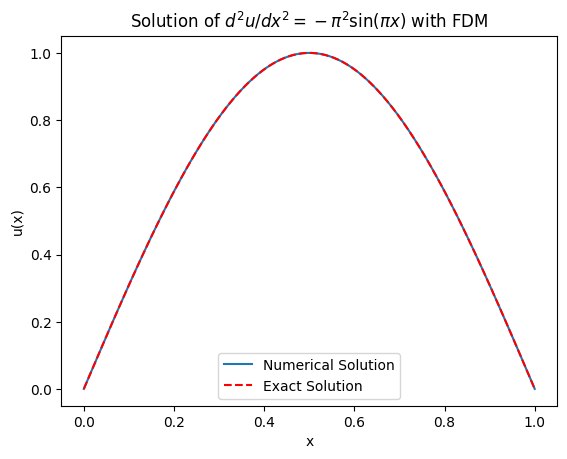

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
N = 100  # Number of grid points
a = 0    # Left boundary
b = 1    # Right boundary
h = (b - a) / (N + 1)  # Step size

# Define the grid points
x = np.linspace(a, b, N+2)  # Include boundary points

# Right-hand side of the differential equation (f(x) = -pi^2 * sin(pi * x))
f = -np.pi**2 * np.sin(np.pi * x[1:-1])

# Initialize the matrix A (tridiagonal matrix)
A = np.zeros((N, N))

# Fill the tridiagonal matrix A
for i in range(N):
    A[i, i] = -2 / h**2  # Diagonal elements
    if i > 0:
        A[i, i-1] = 1 / h**2  # Lower diagonal elements
    if i < N - 1:
        A[i, i+1] = 1 / h**2  # Upper diagonal elements

# Solve the linear system A * u = f
u = np.linalg.solve(A, f)

# Add the boundary conditions (u(0) = 0 and u(1) = 0)
u = np.concatenate(([0], u, [0]))

# Plot the solution
plt.plot(x, u, label='Numerical Solution')
plt.plot(x, np.sin(np.pi * x), 'r--', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution of $d^2u/dx^2 = -\pi^2 \sin(\pi x)$ with FDM')
plt.show()
